In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import LinearSVC, SVC

In [9]:
file = pd.read_csv(r'Dataset/Dataset_13.05.2020_11.18am_1.csv')
tweets = np.asarray(file['Tweet'].copy())
targets = np.asarray(file['Is_Unreliable'].copy())
tweet_embeddings = np.load(r'Dataset/Tweet_Embeddings_Word2Vec_13.05.2020_2.41pm_1.npy', allow_pickle=True)
print(tweet_embeddings.shape)
print(tweet_embeddings[0].shape)

print('')
X = list()
for tweet in tweet_embeddings:
    embeddings = np.mean(tweet, axis=0, dtype=np.float64)
    X.append(embeddings)
X = np.asarray(X)
print(X.shape)
print(X.dtype)

y = targets
print(y.shape)
print(y.dtype)

(560,)
(15, 300)

(560, 300)
float64
(560,)
int64


[0.10591514 0.08552138]


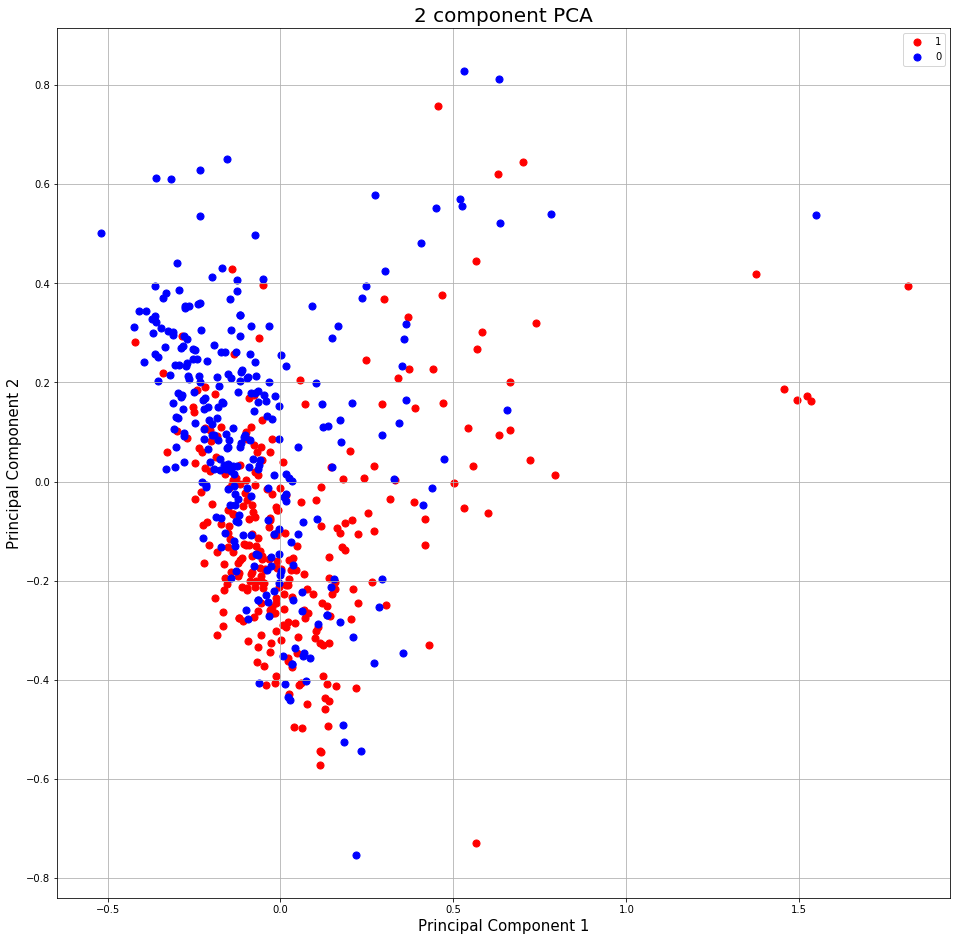

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
principalComponents = pca.fit_transform(X)

print(pca.explained_variance_ratio_) #how much percent information each contain
# print(principalComponents.shape)

fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [1, 0]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = (y == target)
    ax.scatter(principalComponents[indicesToKeep][:,0], principalComponents[indicesToKeep][:,1], c = color, s = 50)

ax.legend(targets)
ax.grid()

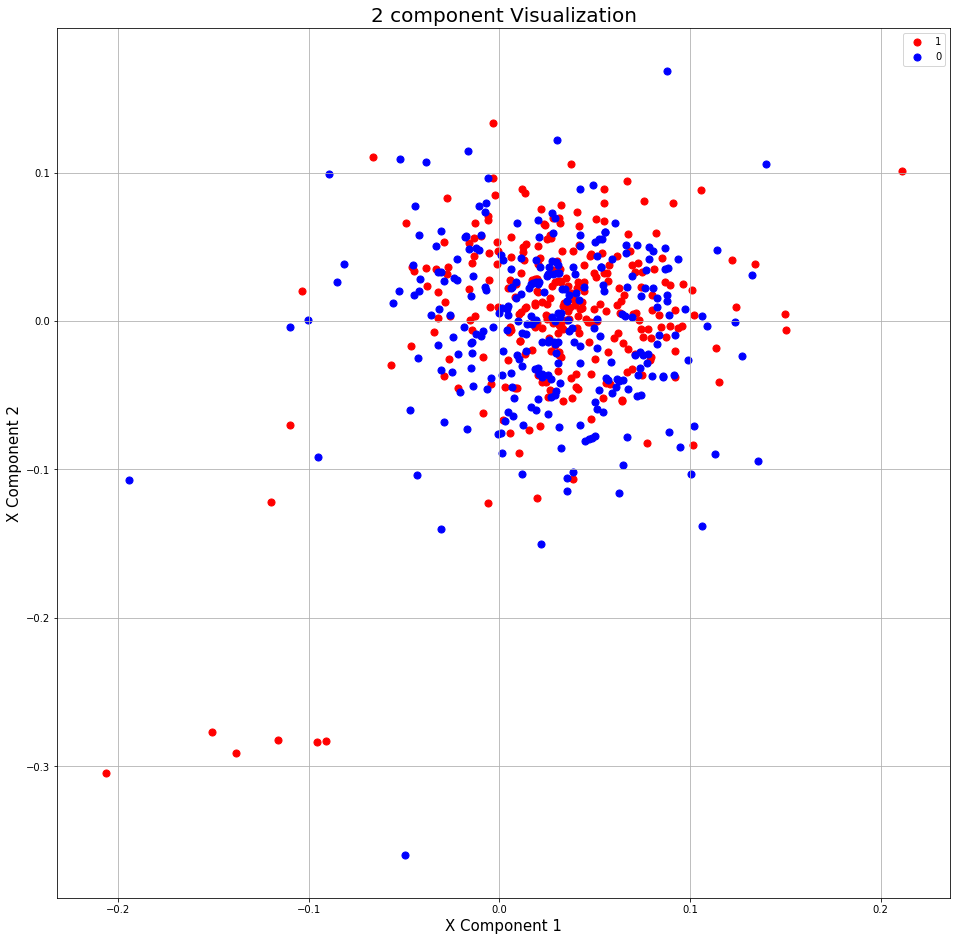

In [49]:
fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('X Component 1', fontsize = 15)
ax.set_ylabel('X Component 2', fontsize = 15)
ax.set_title('2 component Visualization', fontsize = 20)

targets = [1, 0]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = (y == target)
    ax.scatter(X[indicesToKeep][:,1], X[indicesToKeep][:,6], c = color, s = 50)

ax.legend(targets)
ax.grid()